# MLOps Training

This notebook give a exemple on how to use MLOps to training a ML model

### MLOpsTrainingClient

It's where you can manage your trainining experiments

In [ ]:
from mlops_codex.training import MLOpsTrainingClient

### Initializing the MLOpsTrainingClient
In this cell, we are initializing the `MLOpsTrainingClient` which will be used to manage our training experiments.

In [ ]:
client = MLOpsTrainingClient()
client

## MLOpsTrainingExperiment

It's where you can create a training experiment to find the best model

#### Custom training

With Custom training, you have to create the training function. For you, as a data scientist, it's common to re-run the entire notebook, over and over. To avoid creating the same experiment repeatedly, the `force = False` parameter will disallow it. If you wish to create a new experiment with the same attributes, turn `force = True`.

If you have two equal experiments and pass `force = False`, the first created experiment will be chosen.

In [ ]:
# Creating a new training experiment
training = client.create_training_experiment(
    experiment_name='experiment',
    model_type='Classification',
    group='<group>',
)

In [ ]:
training

In [ ]:
# With the experiment class we can create multiple model runs
PATH = './samples/train/'

run = training.run_training(
    run_name='First test',
    training_type='Custom',
    train_data=PATH + 'dados.csv',
    requirements_file=PATH + 'requirements.txt',
    source_file=PATH + 'app.py',
    python_version='3.9',
    training_reference='train_model',
    wait_complete=True
)

#### AutoML

With AutoML you just need to upload the data and some configuration

In [ ]:
PATH = './samples/autoML/'

run2 = training.run_training(
    run_name='First test',
    training_type='AutoML',
    conf_dict=PATH + "conf.json",
    train_data=PATH + 'dados.csv',
    wait_complete=True
)

#### External Training

Besides the autoML and custom training, you can perform a training on your own machine and upload the files!

Look the example bellow



In [ ]:
PATH = './samples/uploadTrainedModel/'

run3 = training.run_training(
    run_name='First test',
    training_type="External",
    features_file=PATH + 'features.parquet',
    target_file=PATH + 'target.parquet',
    output_file=PATH + 'predictions.parquet',
    metrics_file=PATH + 'metrics.json',
    parameters_file=PATH + 'parameters.json',
    requirements_file=PATH + 'requirements.txt',
    wait_complete=True
)

---

#### Interactive External Training

However, if you wish something more interactive, take a look in the example bellow.

In [1]:
from mlops_codex.training import MLOpsTrainingClient
client = MLOpsTrainingClient()
training = client.create_training_experiment(
    experiment_name='Teste',
    model_type='Classification',
    group='<group>'
)

March 19, 2025 | INFO: __init__ Loading .env
March 19, 2025 | INFO: __init__ Successfully connected to MLOps
March 19, 2025 | INFO: create_training_experiment Trying to load experiment...
March 19, 2025 | INFO: __get_repeated_thash Found experiment with same attributes...
March 19, 2025 | INFO: __init__ Loading .env
March 19, 2025 | INFO: __init__ Successfully connected to MLOps


In [2]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [3]:
base_path = './samples/train/'
df = pd.read_csv(base_path+"/dados.csv")
X = df.drop(columns=['target'])
y = df[["target"]]

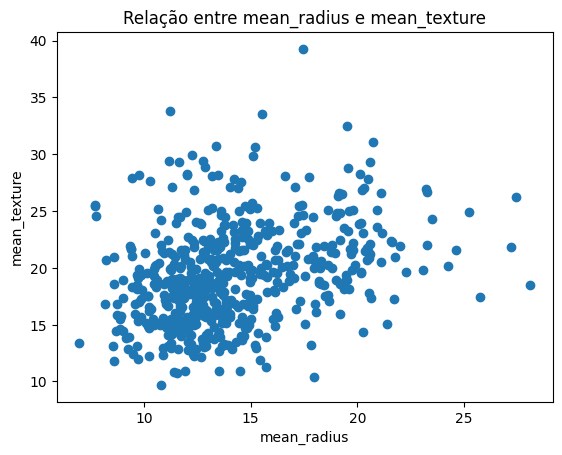

In [4]:
import matplotlib.pyplot as plt

plt.scatter(df["mean_radius"], df["mean_texture"])

# Configurar o título do gráfico
plt.title("Relação entre mean_radius e mean_texture")

# Configurar os rótulos dos eixos
plt.xlabel("mean_radius")
plt.ylabel("mean_texture")

fig = plt.gcf()

# Exibir o gráfico
plt.show()


In [5]:
pipe = make_pipeline(SimpleImputer(), LGBMClassifier(force_col_wise=True))
pipe.fit(X, y)

/home/henrique/.local/share/virtualenvs/mlops-neomaril-codex-48dADUmW/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/henrique/.local/share/virtualenvs/mlops-neomaril-codex-48dADUmW/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('lgbmclassifier', LGBMClassifier(force_col_wise=True))])

In [6]:
with training.log_train(name='Teste 2', X_train=X, y_train=y) as logger:
    logger.save_model(pipe)

    model_output = pd.DataFrame({"pred": pipe.predict(X), "proba": pipe.predict_proba(X)[:,1]})

    logger.save_model_output(model_output)

    logger.save_plot(fig=fig, filename="test-image")

    auc = cross_val_score(pipe, X, y, cv=5, scoring="roc_auc")
    f_score = cross_val_score(pipe, X, y, cv=5, scoring="f1")
    logger.save_metric(name='auc', value=auc.mean())
    logger.save_metric(name='f1_score', value=f_score.mean())


/home/henrique/.local/share/virtualenvs/mlops-neomaril-codex-48dADUmW/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/henrique/.local/share/virtualenvs/mlops-neomaril-codex-48dADUmW/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/henrique/.local/share/virtualenvs/mlops-neomaril-codex-48dADUmW/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


March 19, 2025 | INFO: validate Validating external training execution...
March 19, 2025 | INFO: __init__ Loading .env
March 19, 2025 | INFO: __init__ Successfully connected to MLOps
March 19, 2025 | INFO: _register_execution Training Execution '4' created for Teste 2
March 19, 2025 | INFO: __upload_file_or_hash Features for execution was created from file!
March 19, 2025 | INFO: __upload_file_or_hash Target for execution was created from file!
March 19, 2025 | INFO: __upload_file_or_hash Output for execution was created from file!
March 19, 2025 | INFO: __upload_file_or_hash Metrics for execution 4 was created from file!
March 19, 2025 | INFO: __upload_file_or_hash Parameters for execution 4 was created from file!
March 19, 2025 | INFO: __upload_file_or_hash Model for execution 4 was created from file!
March 19, 2025 | INFO: __set_python_version Python version patched for training with hash 'T7c73dbd7ae245c2a0604943ae4f27f246c1573b34d9446a98785d8b050d1d93' and id '4'
March 19, 2025 | 